# Overview : logistic regression in numpy 
In this lab session, the goal is to implement a logistic regression model (inference, and training) from scratch using numpy. We assume you have the drawing functions : *plot2DBinaryDataSet* and *plotLine*. 

To start, we consider the simple and toy dataset as follows. Plot it. 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_formats=['svg']
%config InlineBackend.figure_format = 'svg'


ST1 = np.array([[17.0 ,12 ,13 ,15 ,15 ,20 ,20],[ 10 ,12 ,14 ,15 ,20 ,15 ,20]]) # class 0
ST2 = np.array([4, 7.5, 10 ,11, 5 ,5 ,6, 8, 5, 0, 5, 0, 10, 6]).reshape(2,7) # class 1 
X = np.concatenate((ST1,ST2),axis=1)
print(X)
print('*************************************************************************')
Y = np.ones(14)
Y[7:] = 0
print(Y)

[[17.  12.  13.  15.  15.  20.  20.   4.   7.5 10.  11.   5.   5.   6. ]
 [10.  12.  14.  15.  20.  15.  20.   8.   5.   0.   5.   0.  10.   6. ]]
*************************************************************************
[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


# Logistic regression

The logistic regression model defines a linear separation in the input space. The distance between the separator hyperplane and the point is interpreted as the probability of a binary event. During this lab session, we will work in 2D but all the approach and the code can be generalize to higher dimension? 

Let $\mathbf{x}$ be a vector (in 2D for instance). The logistic regression compute the probability of the class $c=1$ as 

$$
P(c=1|\mathbf{x}) = \sigma (\mathbf{w}^t\mathbf{x}+b) = \frac{1}{1+e^{-(\mathbf{w}^t\mathbf{x}+b)}}
$$

The parameters of the model, $\boldsymbol{\theta} = (\mathbf{w},b)$,  are learnt from the training data, by minimizing the loss function: the *minus-loglikelihood* 
$$
\mathcal{L}(\boldsymbol{\theta};D) = - \sum_{i=1}^{N} log P(c_{(i)} | \mathbf{x}_{(i)})
$$
## Compulsory operations

To train such model, we need to code different functions:  
- the inference  
- the computation of the loss function
- the gradient of the loss function w.r.t the parameters 

You will find below the code to fill. For each function, understand the header and test it. The code will be written to directly and seamlessly deal with 1 training example of a minibatch of examples. Complete the following code (note that the first function is already completed). For the function *parameters_gradient_loss*, you have to know beforehand the analytical form of the gradient. This is a question of the homework assignment. 


In [3]:
def init_weights(std=0.1): 
    """Initialize weights with a gaussian of 0 mean
    Args: 
        - std: the variance 
    Returns: 
        - w is a np.array of shape (1,2) 
        - b is a float
    """
    #criamos o vetor normal e o parâmetro b
    w = np.random.randn(1,2)*std
    b = np.random.randn()*std
    return w,b
  

def inference(x,weights,bias):
    """
    Returns sigma(weights^t*x + bias)
    
    Args: 
        - x is a np.array of shape (2,N) with N the number of input points. 
        - weights : the weight vector, numpy array of shape (1,2)
        - bias : the bias term, a float
    
    Returns a np.array of shape (N), one probability per input points
    """
    return 1/(1+np.exp(-(weights@x+bias))) #probabilidade de estar perto da reta ou longe. Por exemplo, na classe 1, quanto maior a probabilidade, mais temos a certeza de que a reta se encontra na classe 1

In [4]:
w,b = init_weights()
x=X[:,0]
print(w,b,x)
print('**********')
print("w: ",w.shape)
print("b: ",type(b))
print("X: ",X.shape)
print("Y: ",Y.shape)
print("x: ",x.shape)
#print("y: ",y.shape)
h=inference(X,w,b)
print('*************')
print(h)
print('******************************')



[[0.02618558 0.09075945]] -0.10004959025251803 [17. 10.]
**********
w:  (1, 2)
b:  <class 'float'>
X:  (2, 14)
Y:  (14,)
x:  (2,)
*************
[[0.77776685 0.78638829 0.81920866 0.83944789 0.89167088 0.85631978
  0.9036845  0.67497386 0.63416796 0.54036353 0.65515776 0.50771896
  0.71879107 0.64602698]]
******************************


In [5]:
def loss_fn(y,h): 
    """
    Compute the negative-log-likehood of h (a set of hypothesis), 
    given that y gathers the expected answers. 
    
    Args: 
        - y and h are numpy arrays of the same shape (N). 
    
    Returns: 
        a numpy arrays of the same shape (N)
    """
    return (-(y*np.log(h)+(1-y)*np.log(1-h)))


In [6]:
w,b = init_weights()
print(w,b)
print('***************************')
print(X)
print('***************************')
print(loss_fn(Y,inference(X,w,b)))

[[-0.05171504 -0.11179707]] -0.06652359432916365
***************************
[[17.  12.  13.  15.  15.  20.  20.   4.   7.5 10.  11.   5.   5.   6. ]
 [10.  12.  14.  15.  20.  15.  20.   8.   5.   0.   5.   0.  10.   6. ]]
***************************
[[2.18320002 2.15222236 2.39916174 2.59665099 3.12320461 2.83810045
  3.37170021 0.27083814 0.30968301 0.4433035  0.26458747 0.54375116
  0.21204347 0.30068214]]


In [7]:
def gradient_loss(y,h,x):
    """
    Compute the gradients of the loss function (negative-log-likehood)
    In a minibatch mode, inputs correspond to N training examples. 
    Args: 
        - y : the expected answers (numpy array of size N)
        - h : the hypotheses (numpy array of size N)
        - x : the inputs (numpy array of shape (2,N))
    
    Returns: 
        The gradient w.r.t the weights and the bias term:
        - dw : a numpy array of the  shape (2,N) 
        - db : a numpy array of shape (N)
    """
    #queremos minimizar cada l que calculamos antes. Para isto, devemos calcular a derivada com relação aos parâmetros
    #w e b da reta. dl/dw = l*X (cai o x da exponencial) e dl/db = l 
    
    err=h-y #diff entre hipotèse faite pour le modèle et la valeur calculée
    return x*err, err

In [8]:
def plotLine(u,b,xmin, xmax, ymin, ymax, linestyle = "-", color="k" ):
    """Plot a line in the "box" defined by xmin, xmax, ymin, ymax
    
    Args: 
        - u : The line is defined by its normal vector u, a numpy array of size 2
        - b : the constant term
        - the "box" is defined by xmin, xmax, ymin, ymax
        
    The line has the equation:     u[0]*x + u[1]*y + b = 0 
    """
    if u[1]==0:
        x=-b/u[0]
        plt.plot([x,x],[ymin,ymax])
    else:
        y1=(-b-u[0]*xmin)/u[1]
        y2=(-b-u[0]*xmax)/u[1]
        plt.plot([xmin,xmax],[y1,y2])
        plt.axis([xmin,xmax,ymin,ymax])

    

## Sanity check

In [8]:
# Test everything, look at the dimensions in both cases : 
# for one training example and a batch. 



## A minima you need to look at 
# for the data
print("w: ",w.shape)
print("b: ",type(b))
print("X: ",X.shape)
print("Y: ",Y.shape)
x = X[:,0]
y = Y[0]
print("x: ",x.shape)
print("y: ",y.shape)
# For one training example
h = inference(x,w,b)
h = inference(x,w,b)
l = loss_fn(y,h)
g = gradient_loss(y,h,x)
print("h: ", h.shape,
     "l: " , l.shape,
     "g: " , g[0].shape, g[1].shape
     )
## the batch  version 
H = inference(X,w,b)
L = loss_fn(Y,H)
G = gradient_loss(Y,H,X)
print("H: ", H.shape,
      "L: ", L.shape,
      "G: ", G[0].shape, G[1].shape
     )



w:  (1, 2)
b:  <class 'float'>
X:  (2, 14)
Y:  (14,)
x:  (2,)
y:  ()
h:  (1,) l:  (1,) g:  (2,) (1,)
H:  (1, 14) L:  (1, 14) G:  (2, 14) (1, 14)


# Training algorithm

We have a model (regression logistic), some training data, a training criterion: everything to do machine learning. In this section, the goal is to set up the training (optimisation) algorithm. We consider two ways: stochastic gradient descent, in its online version (one training example at a time and batch version (all the training example). 

## Online training 

At this point, we wrote the useful functions, and we have to write the training loop. It is important to monitor, during the training process, different quantities: 
- the loss function is mandatory (should  decrease during the training process)
- the classification error rate (when it is a classification task) just because it is easier to interpret
- and more (we will see later in the course). 
It can be useful to store in a list the values, for example, of the loss function. The loop is organised in **epochs**. One epoch corresponds to a loop over all the training examples. 



**Questions: ** 
- Write the training loop and try it. Observe the evolution of the loss function (plot it). To start run the training loop for 10000 (1e4) epochs and with a learning rate of 1e-2 (but these should be variables)
- Plot the dataset with the final linear separation
- Modify the training loop to process training examples  in a random order for each epoch. 
- Now observe the the evolution of the linear separation during the training process: plot the line for examples 10 times during the training process. What do you think about the joint evolution of the line and the loss function ? 
- To better explain these observations, modify the training loop to also monitor and plot the norm of the parameter vector: $ \sqrt{||\mathbf{w}||^2+b^2}$. Can you explain what we observe ? 
- Propose a solution to overcome this issue and implement it (hint: we can modify the loss function)





[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
1.0760469029508066


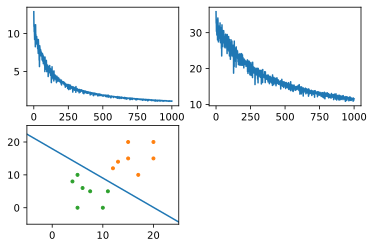

In [9]:
#Questions 1/2/3


w,b = init_weights() # init. of the parameters
n=0.01
Nepoch = 1000 # the number of epoch
# idx stores the indices of training examples
# useful further, to randomize the order of training examples
idx = np.arange(len(Y))
print(idx)
# during one epoch, every training example is seen once by the model
sumloss=np.zeros(Nepoch)
summod=np.zeros(Nepoch)
for e in range(Nepoch):
    # Randomize the order 
    np.random.shuffle(idx)  
    # loop over each example 
    for i in idx:
        x = X[:,i] # the input 
        label = Y[i] # the associated good answer/class
        # Write the necessary code here for an online training step
        h=inference(x,w,b)    
        ls=loss_fn(label,h)
        grad=gradient_loss(label,h,x)
        w=w-n*grad[0]
        b=b-n*grad[1]
        mod=((np.dot(grad[0],grad[0]))**(1/2) + grad[1] **2)**(1/2)
        sumloss[e]=sumloss[e]+ls
        summod[e]=summod[e]+mod
 
        
print(sumloss[Nepoch-1])
  
xis=np.linspace(0,Nepoch,Nepoch)
plt.subplot(2,2,1)
plt.plot(xis,sumloss)
plt.subplot(2,2,2)
plt.plot(xis,summod)
plt.subplot(2,2,3)
plotLine([w[0,0],w[0,1]],b,-5, 25, -5, 25, linestyle = "-", color="k" )
plt.plot(ST1[0,:],ST1[1,:],'.')
plt.plot(ST2[0,:],ST2[1,:],'.')


# A lot of things todo and many cells to analyse the results 
# .... 

0.6905526899458639


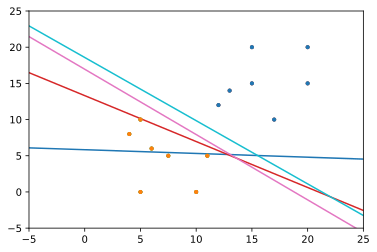

In [11]:
#Question 4


w,b = init_weights() # init. of the parameters
n=0.01
Nepocha = np.array([50,100,500,1000]) # the number of epoch
for k in range(len(Nepocha)):
    Nepoch=Nepocha[k]
    xis=np.linspace(0,Nepoch,Nepoch)
    # idx stores the indices of training examples
    # useful further, to randomize the order of training examples
    idx = np.arange(len(Y))
    # during one epoch, every training example is seen once by the model
    sumloss=np.zeros(Nepoch)
    summod=np.zeros(Nepoch)
    for e in range(Nepoch):
        # Randomize the order 
        np.random.shuffle(idx)  
        # loop over each example 
        for i in idx:
            x = X[:,i] # the input 
            label = Y[i] # the associated good answer
            # Write the necessary code here for an online training step
            h=inference(x,w,b)    
            ls=loss_fn(label,h)
            grad=gradient_loss(label,h,x)
            w=w-n*grad[0]
            b=b-n*grad[1]
            mod=((np.dot(grad[0],grad[0]))**(1/2) + grad[1] **2)**(1/2)
            sumloss[e]=sumloss[e]+ls
            summod[e]=summod[e]+mod
    plotLine([w[0,0],w[0,1]],b,-5, 25, -5, 25, linestyle = "-", color="k" )
    plt.plot(ST1[0,:],ST1[1,:],'.')
    plt.plot(ST2[0,:],ST2[1,:],'.')
    
print(sumloss[Nepoch-1])
  
#xis=np.linspace(0,Nepoch,Nepoch)
#plt.subplot(2,2,1)
#plt.plot(xis,sumloss)
#plt.subplot(2,2,2)
#plt.plot(xis,summod)
#plt.subplot(2,2,3)

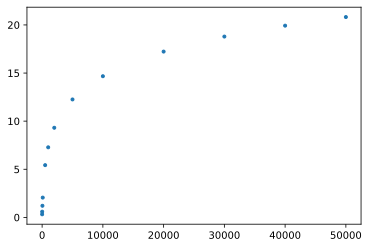

In [12]:
 #Question 5


w,b = init_weights() # init. of the parameters
n=0.01
Nepocha = np.array([2,10,50,100,500,1000,2000,5000,10000,20000,30000,40000,50000]) # the number of epoch
mod1=np.zeros(len(Nepocha))
m=0
idx = np.arange(len(Y))
# during one epoch, every training example is seen once by the model
Nepoch=Nepocha[len(Nepocha)-1]
sumloss=np.zeros(Nepoch+1)
summod=np.zeros(Nepoch+1)
for e in range(Nepoch+1):
    # Randomize the order 
    np.random.shuffle(idx)  
    # loop over each example
    for i in idx:
        x = X[:,i] # the input 
        label = Y[i] # the associated good answer
        # Write the necessary code here for an online training step
        h=inference(x,w,b)    
        ls=loss_fn(label,h)
        grad=gradient_loss(label,h,x)
        w=w-n*grad[0]
        b=b-n*grad[1]
        mod=((np.dot(grad[0],grad[0]))**(1/2) + grad[1] **2)**(1/2)
        sumloss[e]=sumloss[e]+ls
        summod[e]=summod[e]+mod
    if e==Nepocha[m]:
        mod1[m]=mod1[m]+((w[0,0]**2 + w[0,1]**2)**(1/2) + b**2)**(1/2)
        m=m+1
plt.plot(Nepocha,mod1,'.')
    
    

In [51]:
Nepocha = np.array([2,10,50,100,500,1000])
a=Nepocha[len(Nepocha)-1]
print(len(Nepocha))
print(a)
print("****************")
Nepoch=Nepocha[len(Nepocha)-1]
sumloss=np.zeros(Nepoch)
print(sumloss)

6
1000
****************
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.

## Batch training 

Do the same questions for batch training

In [183]:
# A lot of things todo and many cells 

a=np.array([2,3,4])
b=norm(a)

NameError: name 'norm' is not defined

# New datasets 

Consider now the dataset stored in the file *nl_dataset1.pck*. This file is a pickle, the serialization format for python. Serialization refers to the process of converting an object in memory to a byte stream that can be stored on disk or sent over a network. Later on, this byte stream can then be retrieved and de-serialized back to a Python object. 

## Python comment 

If you want to use data across different programming languages, pickle is not recommended. Its protocol is specific to Python, thus, cross-language compatibility is not guaranteed. The same holds for different versions of Python itself.

### dump
However, if you want to save some data you use or you created with your code, it is easy. For instance, assume you want to store these two python objects: 

In [13]:
a = np.arange(10)
b = np.square(2*np.random.randn(10)) 
print(a,b)

[0 1 2 3 4 5 6 7 8 9] [ 4.37987895 19.97931268  1.32570952  2.52165674  1.85214048  0.77620104
 12.76875862  1.07767375  8.03512111  4.10486645]


You need to open a file in write mode and dump a and b. 

In [15]:
f = open("toto.pck","wb")
import pickle
pickle.dump((a,b),f) # create a tuple with a and b and save it in the file toto
f.close()

### load

If later you want to recover these precious data

In [17]:
f = open("toto.pck","rb") # open the file in read mode
tmp = pickle.load(f) # create a tuple with a and b and save it the file toto
f.close()
# now explore what we get 
print(type(tmp),len(tmp))
print(tmp)

<class 'tuple'> 2
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 4.37987895, 19.97931268,  1.32570952,  2.52165674,  1.85214048,
        0.77620104, 12.76875862,  1.07767375,  8.03512111,  4.10486645]))


In [18]:
print(tmp[0],tmp[1])

[0 1 2 3 4 5 6 7 8 9] [ 4.37987895 19.97931268  1.32570952  2.52165674  1.85214048  0.77620104
 12.76875862  1.07767375  8.03512111  4.10486645]


## Back to the data
- Load the pickle and explore its content. It's a binary dataset in 2D. The tuple you get contains two subset: the  points of each class. 
- Plot the dataset. For a better view of the overlapping region, you can plot points with "+" instead of points. 
- Build a dataset as you used to train the logistic regression
- Train a logistic model and look at the results
- Try the same with nl_dataset2.pck and nl_dataset3.pck